# PART -1

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [2]:
#load the dataset
df = pd.read_csv("Pid-rating.csv")
df1 = pd.read_csv("Descriptions.csv")


In [3]:
df.head(5)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [4]:
df1.head(5)

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [5]:
df.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [6]:
df1.isnull().sum()

product_uid            0
product_description    0
dtype: int64

In [7]:
def plot(df, col, title):    
    f, ax = plt.subplots(figsize=(15, 8))
    sns.set(style="darkgrid")
    x=df[col].value_counts()
    x=x.reset_index()
    x[col]=100*x[col]/sum(x[col])
    x=x.sort_values(col)
    x=x[x[col]>1]
    ax = sns.barplot(x="index", y=col, data=x,orient="v")
    plt.xticks(rotation='vertical')

    plt.title(title)
    plt.ylabel('Percentage')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

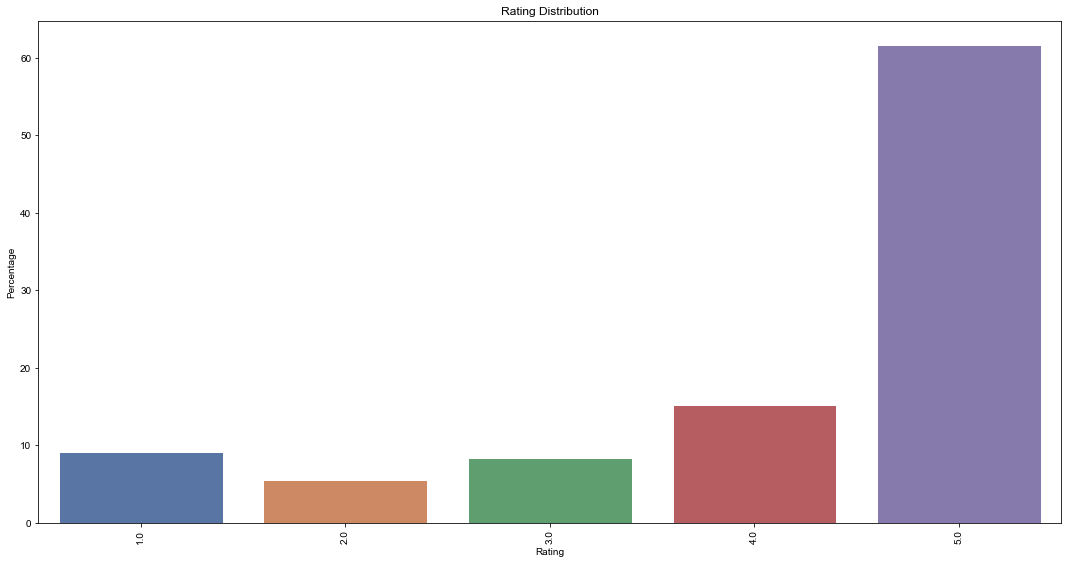

In [8]:
plot(df,'Rating','Rating Distribution')

In [9]:
df["UserId"].value_counts()

A3KEZLJ59C1JVH    389
A281NPSIMI1C2R    336
A3M174IC0VXOS2    326
A2V5R832QCSOMX    278
A3LJLRIZL38GG3    276
                 ... 
A2EJR2QNZHRQ15      1
A1OUYY86MJZNWN      1
A2JG9LI3GXDUVD      1
A1AB75VRUEUNCH      1
A183ZGMBC4WWYQ      1
Name: UserId, Length: 1210271, dtype: int64

In [10]:
df["ProductId"].value_counts()

B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
              ... 
B0081UAQTQ       1
B0080L5D8K       1
B000MMLPHS       1
B00ASFX2NE       1
B002VECIYE       1
Name: ProductId, Length: 249274, dtype: int64

In [11]:
most_sold_product = pd.DataFrame(df.groupby("ProductId")["Rating"].count() )

In [12]:
most_sold_product

,Rating
ProductId,
0205616461,1
0558925278,2
0733001998,1
0737104473,1
0762451459,1
...,...
B00LORWRJA,1
B00LOS7MEE,1
B00LP2YB8E,1


In [13]:
product = most_sold_product.sort_values("Rating",ascending = False)

In [14]:
product.head(5)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088


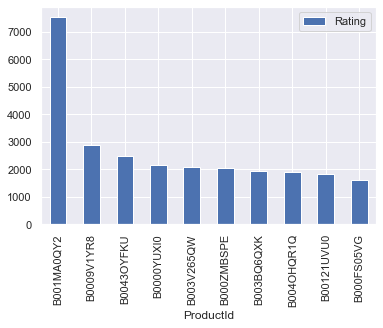

In [15]:
product.head(10).plot(kind='bar')

In [16]:
#product B001MA0QY2 is the most sold product

# PART-2
Collabarative Filtering system will be used in order to identify the patterns based on the purchase of different products by different users

In [17]:
new_df = df.head(10000)

In [18]:
utility_matrix = new_df.pivot_table(values = "Rating",index = "UserId",columns='ProductId',fill_value=0)

In [19]:
utility_matrix

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZHJZP4GQPPZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZNK89PXD006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZOFVMQC0BJG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X = utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X1 = X

# Decomposing of Matrix

In [22]:
SVD = TruncatedSVD(n_components=12)
decomposition = SVD.fit_transform(X)
decomposition

array([[-1.46841084e-15,  3.37946060e-14,  5.08511844e-14, ...,
         7.38433828e-13,  2.19168268e-12, -7.42153787e-13],
       [ 3.05473154e-14, -4.23276176e-13,  4.15544868e-13, ...,
        -7.85917906e-11, -4.08931153e-12, -2.96053624e-13],
       [-3.93941409e-16,  1.23032391e-14,  1.02512895e-14, ...,
         4.16551743e-14,  4.21985219e-13, -3.06383703e-13],
       ...,
       [ 3.20312126e-06,  2.27949395e-01, -1.04112964e-02, ...,
        -4.94001981e-02,  9.79251352e-04,  2.01347455e-03],
       [-6.83924837e-06,  7.47554229e-04,  3.40962360e-06, ...,
        -1.54151160e-04, -9.90909860e-03, -2.62399432e-03],
       [ 3.58071940e-05,  4.16768422e-01,  3.65527137e-01, ...,
         1.88270819e-01,  3.35495345e-01, -2.55345912e-01]])

# Correlation Matrix

In [23]:
corr_matrix = np.corrcoef(decomposition)
corr_matrix.shape

(886, 886)

In [24]:
i = "0205616461"
    
product_name = list(X.index)
product_ID = product_name.index(i)
product_ID    
    
    

0

In [25]:
corr_product_ID = corr_matrix[product_ID] 

In [26]:
#For recommending
recommend = list(X.index[corr_product_ID > 0.1])
recommend.remove(i)
recommend[0:5]

['0733001998', '1304139212', '1304139220', '130414089X', '130414643X']

# PART3

In [27]:
df1.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [28]:
descriptions1 = df1.head(10000)

In [29]:
descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [30]:
vectorizer = TfidfVectorizer(stop_words = "english")
X1 = vectorizer.fit_transform(descriptions1["product_description"])

In [31]:
#Elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
   wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
#fitting Kmeans into the data set
from sklearn.cluster import KMeans

X=X1

kmeans = KMeans(n_clusters =10 ,init='k-means++')
y_kmeans = kmeans.fit_predict(X)



In [34]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]  #sorting of centroids
terms = vectorizer.get_feature_names()      #vectorized
for i in range(true_k):    #for looping through the clusters
    print("Cluster %d:" % i),    
    for ind in order_centroids[i, :10]:    #the placement through the centroids i.e the item we want to display
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 ft
 use
 easy
 home
 wall
 used
 wood
 installation
 design
 product
Cluster 1:
 light
 watt
 bulb
 energy
 led
 lighting
 bulbs
 fan
 white
 incandescent
Cluster 2:
 window
 frame
 patio
 fabric
 table
 outdoor
 chairs
 weather
 cushions
 dining
Cluster 3:
 water
 shower
 faucet
 valve
 toilet
 sink
 tank
 heater
 hot
 spray
Cluster 4:
 door
 doors
 cabinet
 vanity
 glass
 wood
 hardware
 adjustable
 storage
 easy
Cluster 5:
 paint
 rug
 vary
 colors
 ri
 fee
 mn
 ct
 ca
 states
Cluster 6:
 steel
 cutting
 use
 blade
 tool
 easy
 handle
 duty
 power
 metal
Cluster 7:
 battery
 volt
 lithium
 ion
 batteries
 power
 charger
 cordless
 tool
 driver
Cluster 8:
 cooking
 oven
 cu
 air
 temperature
 freezer
 cycle
 ft
 food
 burner
Cluster 9:
 tile
 indoor
 thinset
 recommended
 frost
 commercial
 residential
 wall
 pieces
 piece


In [35]:
print("Cluster ID:")
Y = vectorizer.transform(["tile"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[0]


In [38]:
print("Cluster ID:")
Y = vectorizer.transform(["bulb"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[1]


In [37]:
print("Cluster ID:")
Y = vectorizer.transform(["water"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[3]
